In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
plt.style.use('seaborn-notebook')

In [1]:
%store -r

In [2]:
df_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4614 entries, 35c9fc6e72c911e99681dca9049399ef to 35cf7a1772c911e9b029dca9049399ef
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age                           4614 non-null   category
 1   annual_income                 4614 non-null   category
 2   country                       4614 non-null   category
 3   duolingo_platform             4614 non-null   category
 4   duolingo_subscriber           4614 non-null   category
 5   duolingo_usage                4614 non-null   category
 6   employment_status             4614 non-null   category
 7   gender                        4614 non-null   category
 8   primary_language_commitment   4614 non-null   category
 9   primary_language_review       4614 non-null   category
 10  primary_language_motivation   4614 non-null   category
 11  primary_language_proficiency  4614 non-null   category

In [27]:
df_income = df_clusters.groupby(['Segment', 'annual_income']).size().reset_index()
df_income.rename(columns = {0:'Count'}, inplace = True)
df_income

,Segment,annual_income,Count
0,A,"$0 - $10,000",547
1,A,"$11,000 - $25,000",326
2,A,"$26,000 - $75,000",399
3,A,"$76,000 - $150,000",165
4,A,"$151,000 or more",78
5,B,"$0 - $10,000",163
6,B,"$11,000 - $25,000",188
7,B,"$26,000 - $75,000",505
8,B,"$76,000 - $150,000",264
9,B,"$151,000 or more",182


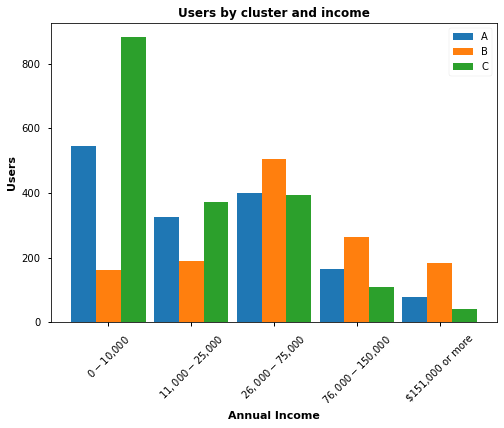

In [82]:
labels = list(df_income['annual_income'].cat.categories)
a_counts = df_income[df_income['Segment']=='A']['Count']
b_counts = df_income[df_income['Segment']=='B']['Count']
c_counts = df_income[df_income['Segment']=='C']['Count']

width = 0.3  # the width of the bars
x = np.arange(len(labels))
x_a = [i - width for i in x]
x_b = x
x_c = [i + width for i in x]

fig, ax = plt.subplots()
bars_a = ax.bar(x_a, a_counts, width, label='A')
bars_b = ax.bar(x_b, b_counts, width, label='B')
bars_c = ax.bar(x_c, c_counts, width, label='C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Users', fontweight='bold')
ax.set_xlabel('Annual Income', fontweight='bold')
ax.set_title('Users by cluster and income', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.savefig("../images/users_by_cluster_and_income.png")

plt.show()

In [83]:
df_age = df_clusters.groupby(['Segment', 'age']).size().reset_index()
df_age.rename(columns = {0:'Count'}, inplace = True)

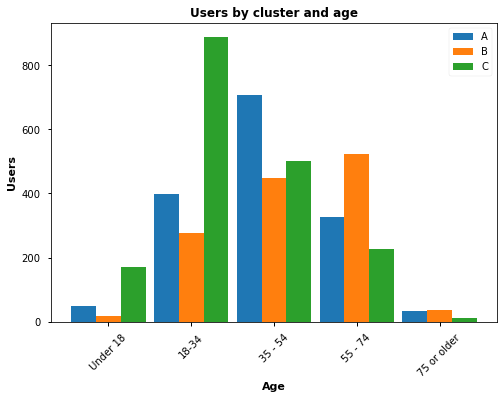

In [84]:
labels = list(df_age['age'].cat.categories)
a_counts = df_age[df_age['Segment']=='A']['Count']
b_counts = df_age[df_age['Segment']=='B']['Count']
c_counts = df_age[df_age['Segment']=='C']['Count']

width = 0.3  # the width of the bars
x = np.arange(len(labels))
x_a = [i - width for i in x]
x_b = x
x_c = [i + width for i in x]

fig, ax = plt.subplots()
bars_a = ax.bar(x_a, a_counts, width, label='A')
bars_b = ax.bar(x_b, b_counts, width, label='B')
bars_c = ax.bar(x_c, c_counts, width, label='C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Users', fontweight='bold')
ax.set_xlabel('Age', fontweight='bold')
ax.set_title('Users by cluster and age', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.savefig("../images/users_by_cluster_and_age.png")

plt.show()

In [85]:
df_country = df_clusters.groupby(['Segment', 'country']).size().reset_index()
df_country.rename(columns = {0:'Count'}, inplace = True)

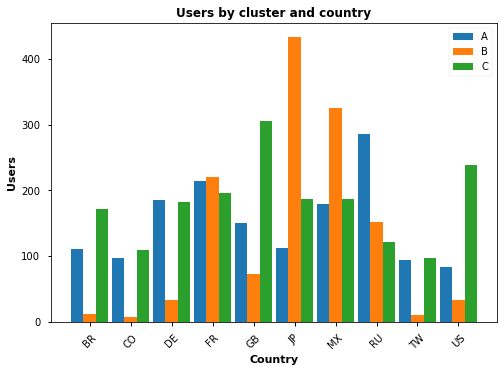

In [86]:
labels = list(df_country['country'].cat.categories)
a_counts = df_country[df_country['Segment']=='A']['Count']
b_counts = df_country[df_country['Segment']=='B']['Count']
c_counts = df_country[df_country['Segment']=='C']['Count']

width = 0.3  # the width of the bars
x = np.arange(len(labels))
x_a = [i - width for i in x]
x_b = x
x_c = [i + width for i in x]

fig, ax = plt.subplots()
bars_a = ax.bar(x_a, a_counts, width, label='A')
bars_b = ax.bar(x_b, b_counts, width, label='B')
bars_c = ax.bar(x_c, c_counts, width, label='C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Users', fontweight='bold')
ax.set_xlabel('Country', fontweight='bold')
ax.set_title('Users by cluster and country', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.savefig("../images/users_by_cluster_and_country.png")

plt.show()

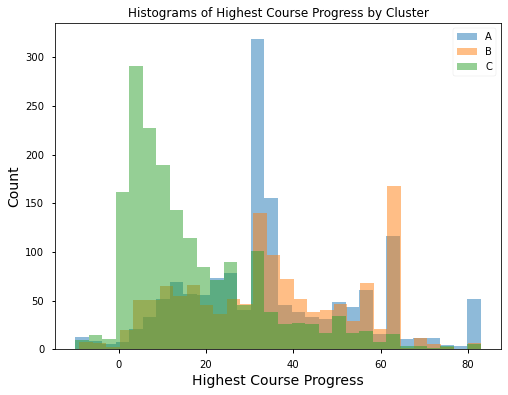

In [87]:
data_a = list(df_clusters[df_clusters['Segment']=='A']['highest_course_progress'])
data_b = list(df_clusters[df_clusters['Segment']=='B']['highest_course_progress'])
data_c = list(df_clusters[df_clusters['Segment']=='C']['highest_course_progress'])

plt.figure(figsize=(8,6))
plt.hist(data_a, bins=30, alpha=0.5, label="A")
plt.hist(data_b, bins=30, alpha=0.5, label="B")
plt.hist(data_c, bins=30, alpha=0.5, label="C")

plt.xlabel("Highest Course Progress", size=14)
plt.ylabel("Count", size=14)
plt.title("Histograms of Highest Course Progress by Cluster")
plt.legend(loc='upper right')
plt.savefig("../images/hist_highest_course_progress.png")

plt.show()

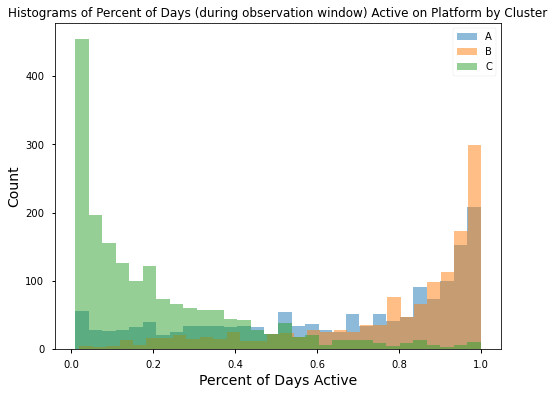

In [88]:
data_a = list(df_clusters[df_clusters['Segment']=='A']['pct_days_active'])
data_b = list(df_clusters[df_clusters['Segment']=='B']['pct_days_active'])
data_c = list(df_clusters[df_clusters['Segment']=='C']['pct_days_active'])

plt.figure(figsize=(8,6))
plt.hist(data_a, bins=30, alpha=0.5, label="A")
plt.hist(data_b, bins=30, alpha=0.5, label="B")
plt.hist(data_c, bins=30, alpha=0.5, label="C")

plt.xlabel("Percent of Days Active", size=14)
plt.ylabel("Count", size=14)
plt.title("Histograms of Percent of Days (during observation window) Active on Platform by Cluster")
plt.legend(loc='upper right')
plt.savefig("../images/hist_pct_days_active.png")

plt.show()